# CS 7641 - HW3 Unsupervised Learning and Dimensionality Reduction (Hotel)


You are to implement (or find the code for) six algorithms. 

The first two are clustering algorithms:

- k-means clustering
- Expectation Maximization

You can choose your own measures of distance/similarity. Naturally, you'll have to justify your choices, but you're practiced at that sort of thing by now.

The last four algorithms are dimensionality reduction algorithms:

- PCA
- ICA
- Randomized Projections
- Any other feature selection algorithm you desire
You are to run a number of experiments. Come up with at least two datasets. If you'd like (and it makes a lot of sense in this case) you can use the ones you used in the first assignment.

1. Run the clustering algorithms on the datasets and describe what you see.
2. Apply the dimensionality reduction algorithms to the two datasets and describe what you see.
3. Reproduce your clustering experiments, but on the data after you've run dimensionality reduction on it. Yes, that’s 16 combinations of datasets, dimensionality reduction, and clustering method. You should look at all of them, but focus on the more interesting findings in your report.
4. Apply the dimensionality reduction algorithms to one of your datasets from assignment #1 (if you've reused the datasets from assignment #1 to do experiments 1-3 above then you've already done this) and rerun your neural network learner on the newly projected data.
5. Apply the clustering algorithms to the same dataset to which you just applied the dimensionality reduction algorithms (you've probably already done this), treating the clusters as if they were new features. In other words, treat the clustering algorithms as if they were dimensionality reduction algorithms. Again, rerun your neural network learner on the newly projected data.


- a discussion of your datasets, and why they're interesting: If you're using the same datasets as before at least briefly remind us of what they are so we don't have to revisit your old assignment write-up... and if you aren't well that's a whole lot of work you're going to have to recreate from assignment 1 isn't it?
- explanations of your methods: for example, how did you choose k?
- a description of the kind of clusters that you got.
- analyses of your results. Why did you get the clusters you did? Do they make "sense"? If you used data that already had labels (for example data from a classification problem from assignment #1) did the clusters line up with the labels? Do they otherwise line up naturally? Why or why not? Compare and contrast the different algorithms. What sort of changes might you make to each of those algorithms to improve performance? How much performance was due to the problems you chose? Be creative and think of as many questions you can, and as many answers as you can. Take care to justify your analysis with data explicitly.
- Can you describe how the data look in the new spaces you created with the various algorithms? For PCA, what is the distribution of eigenvalues? For ICA, how kurtotic are the distributions? Do the projection axes for ICA seem to capture anything "meaningful"? Assuming you only generate k projections (i.e., you do dimensionality reduction), how well is the data reconstructed by the randomized projections? PCA? How much variation did you get when you re-ran your RP several times (I know I don't have to mention that you might want to run RP many times to see what happens, but I hope you forgive me)?
- When you reproduced your clustering experiments on the datasets projected onto the new spaces created by ICA, PCA, and RP, did you get the same clusters as before? Different clusters? Why? Why not?
- When you re-ran your neural network algorithms were there any differences in performance? Speed? Anything at all?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


from sklearn.cluster import KMeans

from sklearn.decomposition import PCA


In [2]:
hotel = pd.read_csv('Data/HotelBooking.csv')
hotel = hotel.sample(frac =.2)

In [3]:
categorical_columns = hotel.columns[hotel.dtypes == 'object'].drop(['reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'])
for i in categorical_columns:
    print(hotel.groupby(i).hotel.count())
    print('\n')

hotel
City Hotel      15715
Resort Hotel     8163
Name: hotel, dtype: int64


arrival_date_month
April        2163
August       2790
December     1395
February     1598
January      1214
July         2528
June         2190
March        2037
May          2315
November     1312
October      2203
September    2133
Name: hotel, dtype: int64


meal
BB           18519
FB             149
HB            2945
SC            2014
Undefined      251
Name: hotel, dtype: int64


country
AGO    75
AND     2
ARE     6
ARG    57
ARM     3
       ..
UZB     3
VEN     4
VNM     1
ZAF    17
ZMB     1
Name: hotel, Length: 130, dtype: int64


market_segment
Aviation            45
Complementary      142
Corporate         1008
Direct            2575
Groups            3990
Offline TA/TO     4876
Online TA        11242
Name: hotel, dtype: int64


distribution_channel
Corporate     1281
Direct        2968
GDS             41
TA/TO        19588
Name: hotel, dtype: int64


reserved_room_type
A    17166
B      248
C 

In [4]:
hotel = (hotel.drop(['reservation_status', 'reservation_status_date', 'name', 'email','phone-number', 'credit_card','agent', 'company'], axis = 1))
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [5]:
hotel = pd.get_dummies(hotel, columns = categorical_columns, drop_first=True)

In [6]:
hotel['children'] = hotel['children'].fillna(0)

In [7]:
feature_cols = hotel.columns.drop(['is_canceled'])
X = hotel[feature_cols]
y = hotel.is_canceled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

For n_clusters = 2 The average silhouette_score is : 0.5253418850480746
For n_clusters = 3 The average silhouette_score is : 0.416158713230617
For n_clusters = 4 The average silhouette_score is : 0.37847304445463203
For n_clusters = 5 The average silhouette_score is : 0.3463566052331391
For n_clusters = 6 The average silhouette_score is : 0.3372673703724178
For n_clusters = 7 The average silhouette_score is : 0.32214569933427895
For n_clusters = 8 The average silhouette_score is : 0.3164493119581199
For n_clusters = 9 The average silhouette_score is : 0.3204227356914753
For n_clusters = 10 The average silhouette_score is : 0.2949977535696059
For n_clusters = 11 The average silhouette_score is : 0.2982267411571873


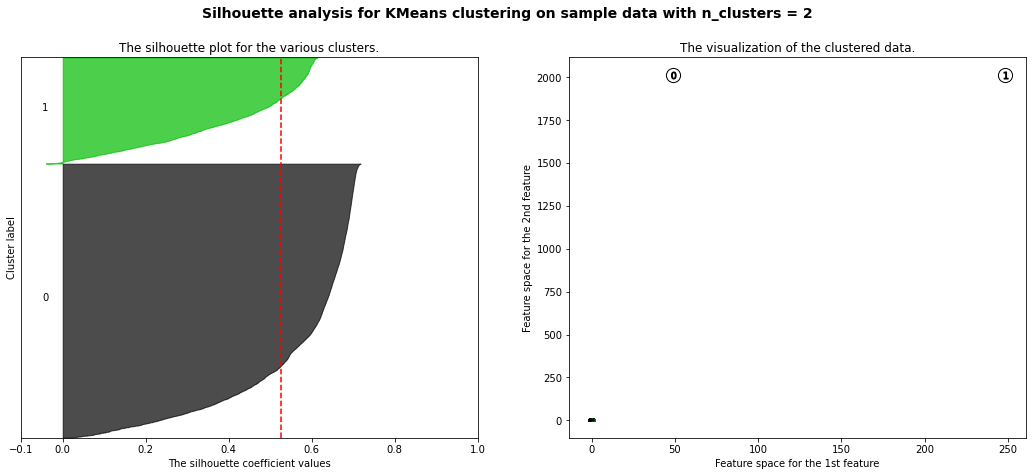

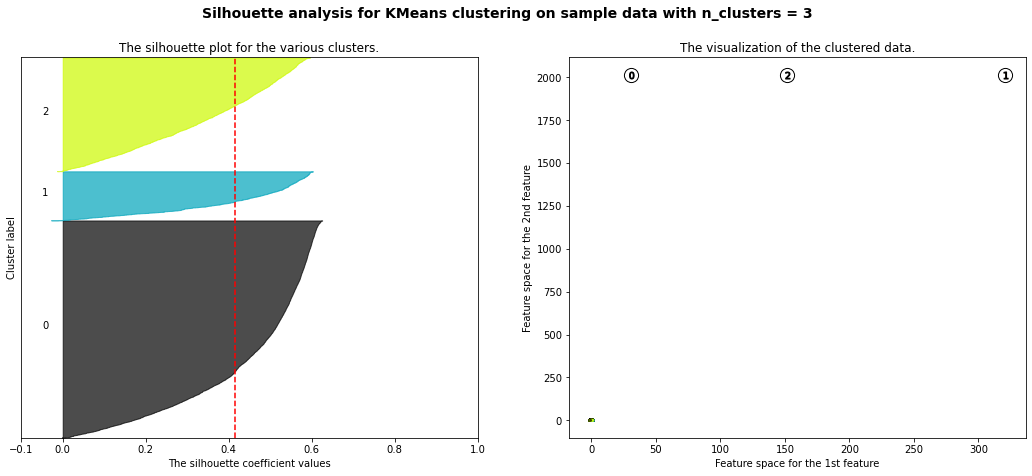

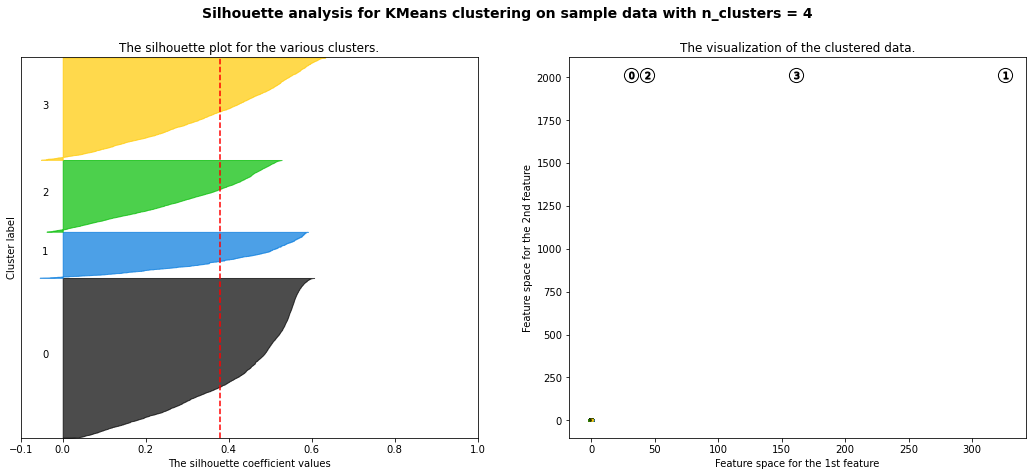

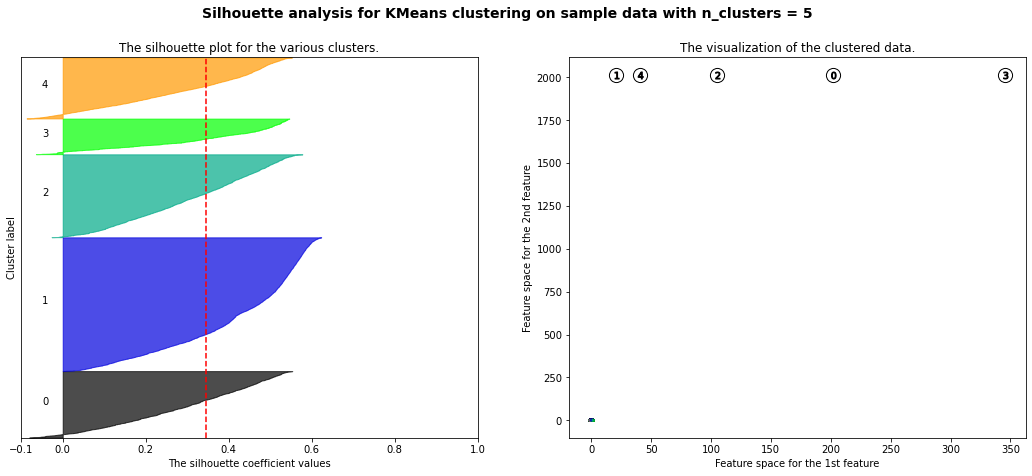

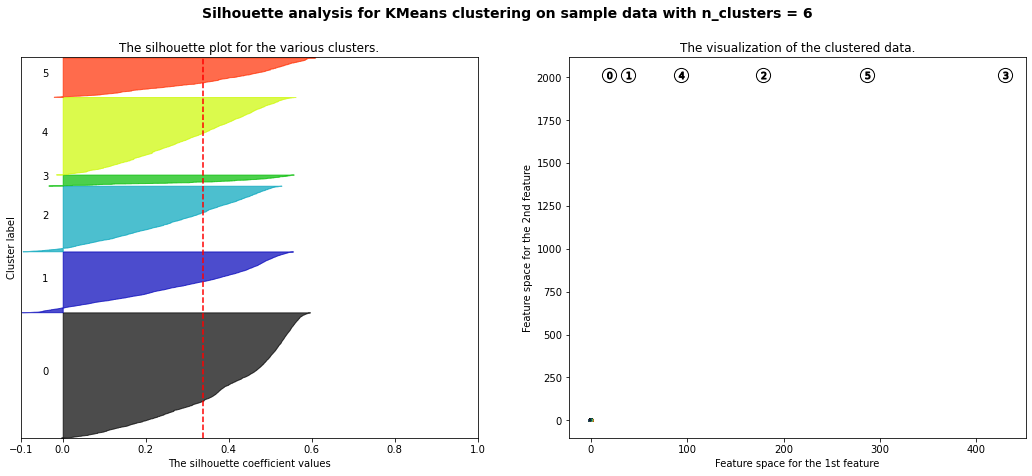

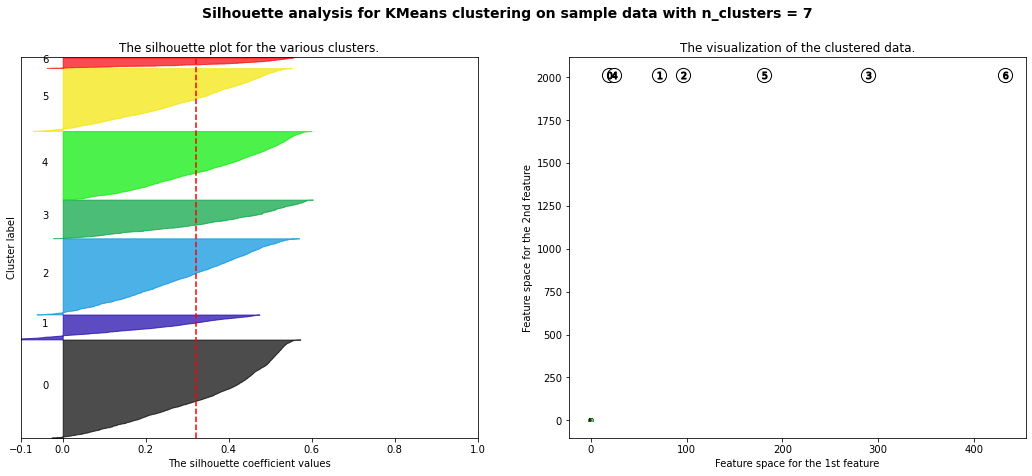

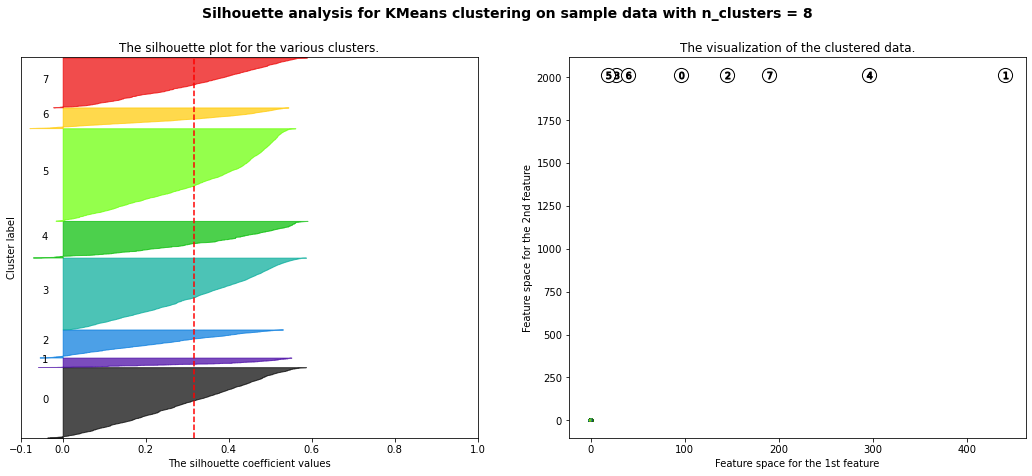

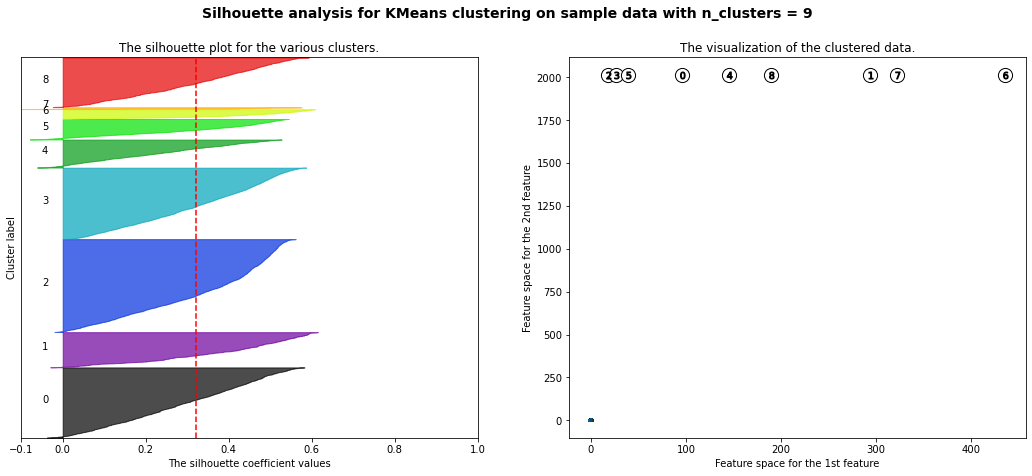

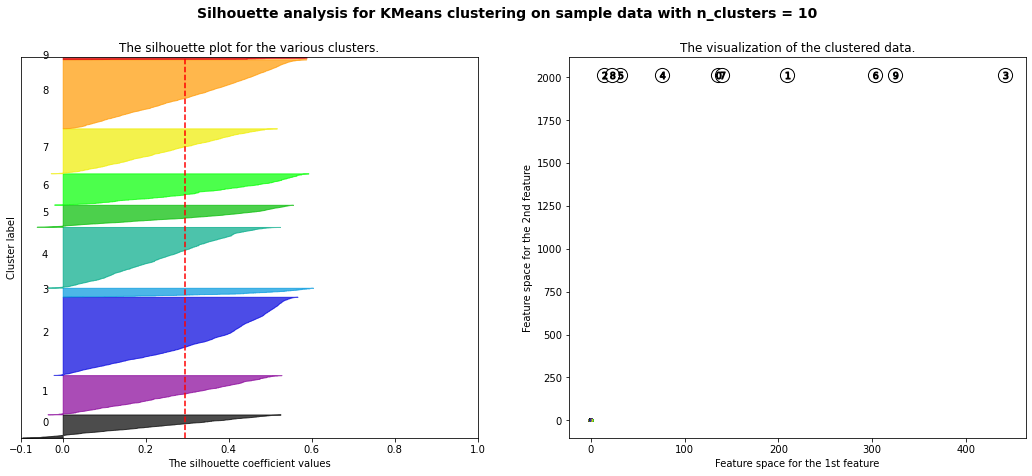

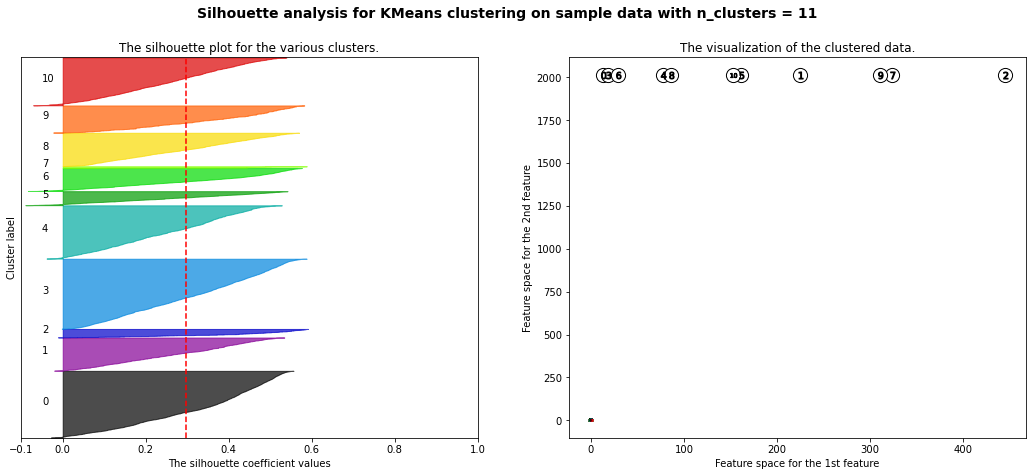

In [23]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(2,12)
distortions = []
km_silhouette = []
inertias = []
mapping1 = {}
mapping2 = {}

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    distortions.append(sum(np.min(cdist(X, clusterer.cluster_centers_,
                                    'euclidean'), axis=1)) / X.shape[0])
    inertias.append(clusterer.inertia_)  
    
    silhouette = silhouette_score(X, cluster_labels)
    km_silhouette.append(silhouette)
    
    mapping1[i] = sum(np.min(cdist(X, clusterer.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[i] = clusterer.inertia_
    
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        results.pca1, results.pca2, marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )
    
    
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

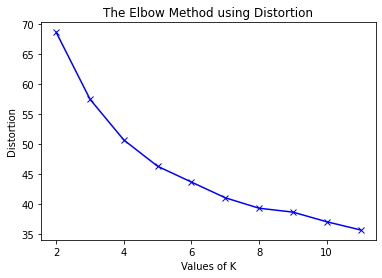

In [24]:
plt.plot(range_n_clusters, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

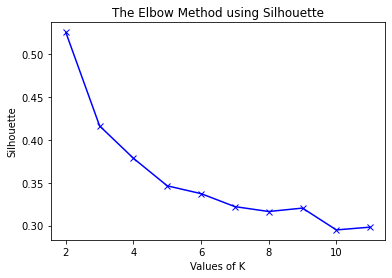

In [25]:
plt.plot(range_n_clusters, km_silhouette, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette')
plt.title('The Elbow Method using Silhouette')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

scaler = MinMaxScaler()
X_scaled=scaler.fit_transform(X)

km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -95313.30240637422
Silhouette score for number of cluster(s) 2: 0.1084272038127893
Davies Bouldin score for number of cluster(s) 2: 2.8214086421699234
V-measure score for number of cluster(s) 2: 4.02961251031257e-05
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -87658.96183064897
Silhouette score for number of cluster(s) 3: 0.1317875483204775
Davies Bouldin score for number of cluster(s) 3: 2.465922752541007
V-measure score for number of cluster(s) 3: 0.02218438856012603
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -82454.30731407295
Silhouette score for number of cluster(s) 4: 0.12458457096316161
Davies Bouldin score for number of cluster(s) 4: 2.3357259238988197
V-measure score for number of cluster(s) 4: 0.04982073484663674
--------------------------------------------------

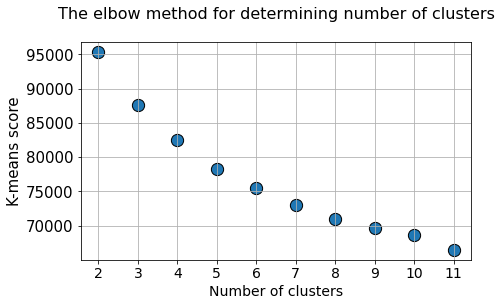

In [16]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

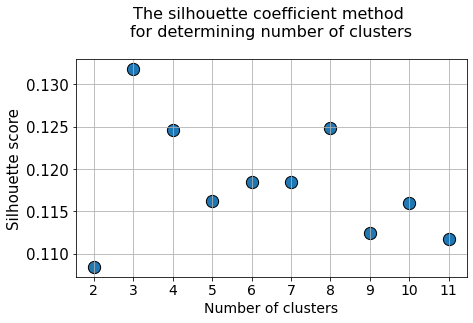

In [17]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [18]:
from sklearn.mixture import GaussianMixture

In [19]:
gm_bic= []
gm_score=[]
for i in range(2,12):
    gm = GaussianMixture(n_components=i,n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
    print("BIC for number of cluster(s) {}: {}".format(i,gm.bic(X_scaled)))
    print("Log-likelihood score for number of cluster(s) {}: {}".format(i,gm.score(X_scaled)))
    print("-"*100)
    gm_bic.append(-gm.bic(X_scaled))
    gm_score.append(gm.score(X_scaled))

BIC for number of cluster(s) 2: -32567157.202859696
Log-likelihood score for number of cluster(s) 2: 690.0993300368576
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 3: -33492867.20635517
Log-likelihood score for number of cluster(s) 3: 713.5587538797698
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 4: -35187060.66662637
Log-likelihood score for number of cluster(s) 4: 753.110050090044
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 5: -35433298.824457504
Log-likelihood score for number of cluster(s) 5: 762.3414848705485
----------------------------------------------------------------------------------------------------
BIC for number of cluster(s) 6: -36168020.6630061
Log-likelihood score for number of cluster(s) 6: 781.8016590914891
------

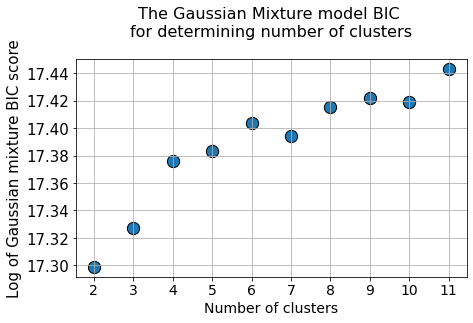

In [20]:
plt.figure(figsize=(7,4))
plt.title("The Gaussian Mixture model BIC \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=np.log(gm_bic),s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Log of Gaussian mixture BIC score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()


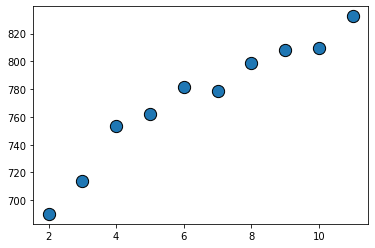

In [21]:
plt.scatter(x=[i for i in range(2,12)],y=gm_score,s=150,edgecolor='k')
plt.show()

# K-Means Clustering

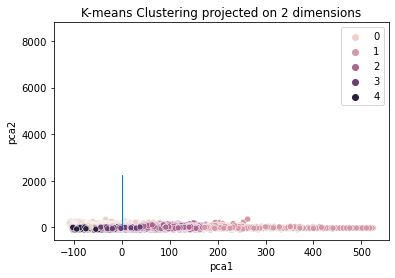

In [76]:
from sklearn.cluster import KMeans
import seaborn as sns


km = KMeans(n_clusters=5, init='random', n_init=10, max_iter=300,tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.hist(y_km)

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue = y_km, data=results)
plt.title('K-means Clustering projected on 2 dimensions')
plt.show()

In [51]:
km_cluster_label = pd.DataFrame({'cluster':y_km, 'label':y.values})
km_cluster_label['cnt'] = 1
km_cluster_label

,cluster,label,cnt
0,4,0,1
1,3,1,1
2,2,1,1
3,4,0,1
4,4,0,1
...,...,...,...
23873,1,0,1
23874,2,1,1
23875,3,1,1
23876,3,1,1


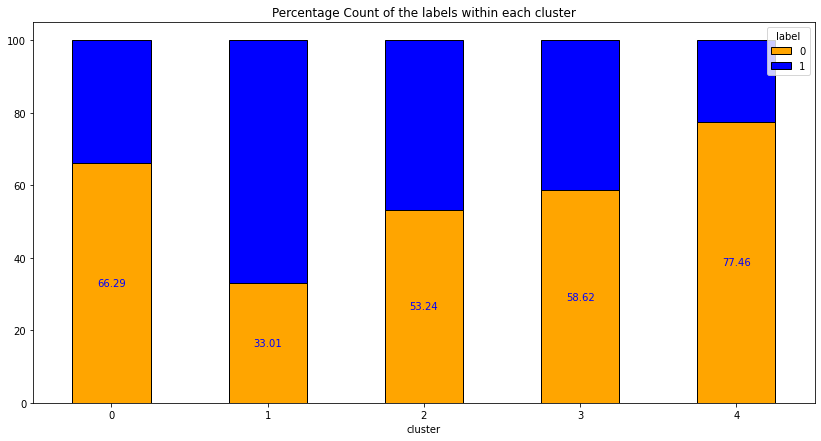

In [75]:
df=km_cluster_label.groupby(['cluster','label']).size().groupby(level=0).apply(lambda x: round(100*x/x.sum(),2))
df=df.unstack()
ax= Q3_df.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    rot=0,
    title='Percentage Count of the labels within each cluster',
    color=['orange','blue'],
    edgecolor='black',
    
)
for c in ax.containers:
    ax.bar_label(c, label_type='center',color='b')

# Expectation Maximization

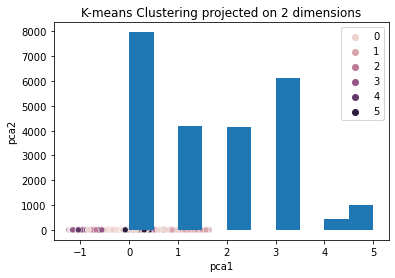

In [78]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=6, n_init=10,tol=1e-3,max_iter=1000).fit(X_scaled)
y_gm = gm.fit_predict(X_scaled)

plt.hist(y_gm)

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(X_scaled)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2'])



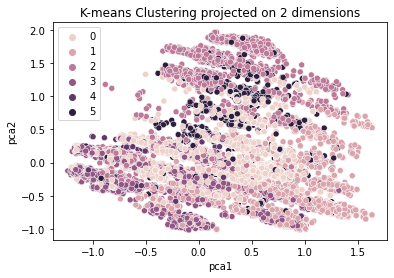

In [81]:
sns.scatterplot(x="pca1", y="pca2", hue = y_gm, data=results)
plt.title('K-means Clustering projected on 2 dimensions')
plt.show()

In [82]:
gm_cluster_label.groupby(['cluster','label']).size()

cluster  label
0        0        3290
         1        4678
1        0        2949
         1        1226
2        0        3306
         1         847
3        0        4433
         1        1698
4        0         275
         1         153
5        0         817
         1         206
dtype: int64

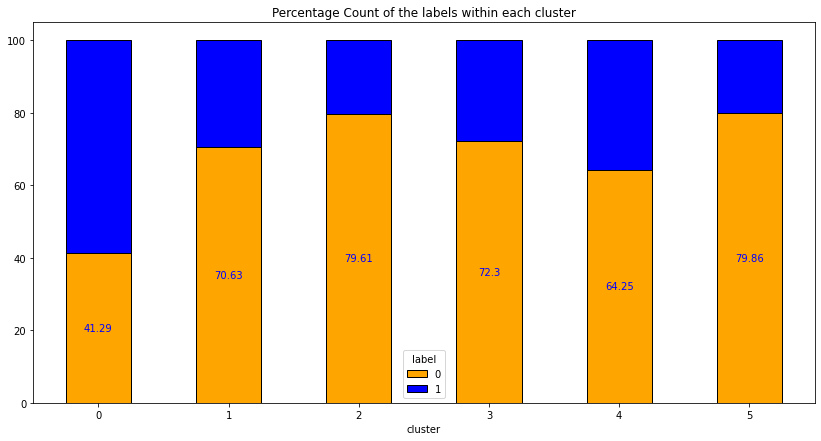

In [83]:
gm_cluster_label = pd.DataFrame({'cluster':y_gm, 'label':y.values})
gm_cluster_label['cnt'] = 1
df=gm_cluster_label.groupby(['cluster','label']).size().groupby(level=0).apply(lambda x: round(100*x/x.sum(),2))
df=df.unstack()
ax= df.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    rot=0,
    title='Percentage Count of the labels within each cluster',
    color=['orange','blue'],
    edgecolor='black',
    
)
for c in ax.containers:
    ax.bar_label(c, label_type='center',color='b')

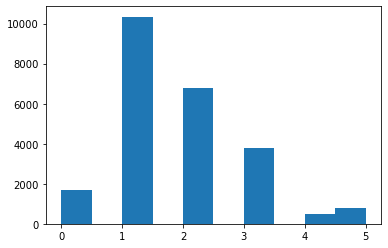

In [85]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=6).fit(X)
y_gm = gm.fit_predict(X)

plt.hist(y_gm)

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
pca_num_components = 2
reduced_data = PCA(n_components=pca_num_components).fit_transform(X)
results = pd.DataFrame(reduced_data, columns=['pca1','pca2'])


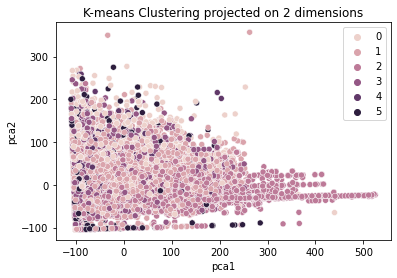

In [86]:

sns.scatterplot(x="pca1", y="pca2", hue = y_gm, data=results)
plt.title('K-means Clustering projected on 2 dimensions')
plt.show()

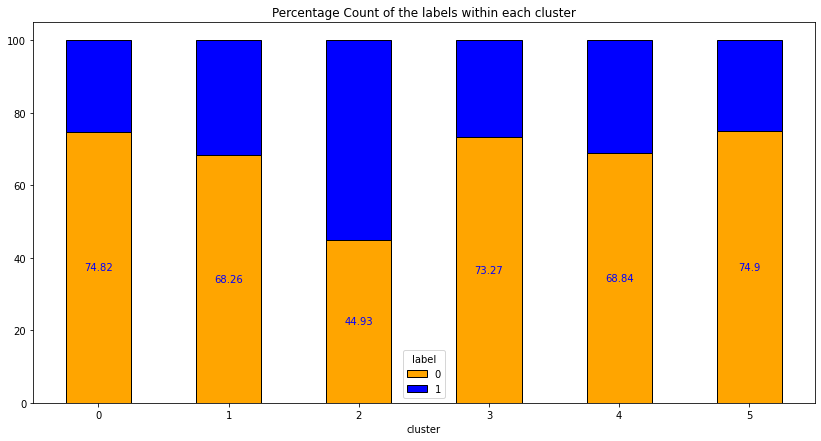

In [87]:
gm_cluster_label = pd.DataFrame({'cluster':y_gm, 'label':y.values})
gm_cluster_label['cnt'] = 1
df=gm_cluster_label.groupby(['cluster','label']).size().groupby(level=0).apply(lambda x: round(100*x/x.sum(),2))
df=df.unstack()
ax= df.plot(
    kind='bar',
    stacked=True,
    figsize=(14,7),
    rot=0,
    title='Percentage Count of the labels within each cluster',
    color=['orange','blue'],
    edgecolor='black',
    
)
for c in ax.containers:
    ax.bar_label(c, label_type='center',color='b')

In [88]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

sc = StandardScaler()
X_std = sc.fit_transform(X)
cov_mat = np.cov(X_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)


# calculate cumulative sum of explained variances
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

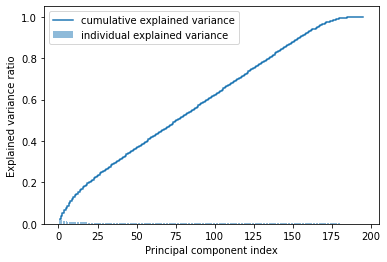

In [89]:
# plot explained variances
plt.bar(range(1,len(var_exp) + 1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,len(var_exp) + 1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()